In order to successfully complete this assignment we recommend that you participate both individually and in groups during class. If you attend class in-person then have one of the instructors check your notebook and sign you out before leaving class. **Turn in your assignment using D2L no later than 11:59pm on the day of class.** Grading is based on correctness and completion.

# 04 In-Class Assignment: Linear Algebra and Python

<img src="https://i.ytimg.com/vi/fSCz7jH_vHI/maxresdefault.jpg" width="70%" alt="Image showing an instructor writing on the board instruction for Gauss-Jordan.  These include 1) 1 Row 1 column 1 2) Kill the rest of the column 3) 1 Row 2 Column 2 4) Kill the rest of the column 4) Answer as a point (x,y).  Although not really an algorithm these instructions give a general idea of how Gauss-Jordan works">

Image from:  Mathbyfives @[YouTube](https://www.youtube.com/watch?v=fSCz7jH_vHI)
    

    

### Agenda for today's class (80 minutes)

1. (20 minutes) [Pre Class Review](#Pre-Class-Review)
2. (20 minutes) [Solving Systems of Linear Equations](#Solving-Systems-of-Linear-Equations)
3. (20 minutes) [Underdetermined Systems](#Underdetermined-Systems)
4. (20 minutes) [Practice   Curve Fitting Example](#Practice---Curve-Fitting-Example)



---
<a name=Pre-Class-Review></a>
## 1. Pre Class Review


In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

Discuss Ax=b format as it relates to augmented matrix. 



---
<a name=Solving-Systems-of-Linear-Equations></a>
## 2. Solving Systems of Linear Equations


Remember the following set of equations from the mass weight example:

<img src="https://lh6.googleusercontent.com/S-glvU6hZySH682ocl1T_2jNWL7S2MUCQeyDFgEZM8GPZ4xLjEkeD9KKsU5otJF0zfgcQtT-zQ=w740" align="center" width="70%" alt="Image showing two balanced beams, each with three weights. In the top beam is unknown weight A is a distance of 40 to the left of the fulcrum, unknown weight B is a distance of 15 to the left of the fulcrum and a weight of 2 is 50 to the right of the fulcrum. In the bottom beam is the same unknown weights.  Weight A is now a distance of 50 to the right of the fulcrum, weight B is a distance of 25 to the left of the fulcrum and the weight of 2 is a distance of 25 to the right of the fulcrum.">

$$40A + 15B = 100$$
$$25B = 50 + 50A$$


As you know, the above system of equations can be written as an Augmented Matrix in the following form:


$$ 
\left[
\begin{matrix}
    40  & 15  \\
    -50 & 25  
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
100 \\ 50 
\end{matrix}
\right] 
$$



&#9989; **<font color=red>QUESTION:</font>**  Split apart the augmented matrix  ($ 
\left[
\begin{matrix}
    A
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
b
\end{matrix}
\right] 
$) into its left size ($2 \times 2$) matrix $A$ and its right ($2x1$) matrix $b$. Define the matrices $A$ and $b$ as ```numpy``` matrices:

In [2]:
A = np.matrix([[40,15],[-50,25]])
b = np.matrix([[100],[50]])

In [3]:
from answercheck import checkanswer

checkanswer.matrix(A,'f5bfd7c52824d5ac580d0ce1ab98fe68');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 40.  15.]
 [-50.  25.]]
Answer seems to be correct



In [4]:
from answercheck import checkanswer

checkanswer.matrix(b,'c760cd470439f5db82bb165edf4dc3f8');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[100.]
 [ 50.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION:</font>**  solve the above system of equations using the ```np.linalg.solve``` function and store the value in a vector named x:

In [9]:
import numpy as np
x = np.linalg.solve(A, b)
C = np.matrix([[40,15,100],[-50,25,50]])
sym.Matrix(C).rref()[0]

⎡1  0  1⎤
⎢       ⎥
⎣0  1  4⎦

In [6]:
from answercheck import checkanswer

checkanswer.vector(x,'fc02fe6d0577c4452ee70252e1e17654');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[1. 4.]]
Answer seems to be correct



### Sympy RREF function

The Python ``sympy`` library has a "reduced row echelon form" (rref) function that runs a much more efficient version of the Gauss-Jordan elimination. To use the rref function you must first convert your matrix into a ``sympy.Matrix`` and then run the function. For example, let's do this for the following matrix $B$:

In [7]:
B = np.matrix([[ 50, 13, 30 ], [100, 26, 60 ],  [20.5, 25, 650]])
sym.Matrix(B).rref()

⎛⎡1  0  -7.82918149466192⎤        ⎞
⎜⎢                       ⎥        ⎟
⎜⎢0  1  32.4199288256228 ⎥, (0, 1)⎟
⎜⎢                       ⎥        ⎟
⎝⎣0  0          0        ⎦        ⎠

This function outputs two values (a matrix and a tuple).  For the purposes of this class we only care about the matrix.  I generally use the following syntax when using ```rref()```

In [75]:
sym.Matrix(B).rref()[0]

⎡1  0  -7.82918149466192⎤
⎢                       ⎥
⎢0  1  32.4199288256228 ⎥
⎢                       ⎥
⎣0  0          0        ⎦

&#9989;**<font color=red>QUESTION</font>**: Although we do not use it often in this course, what does the second output of the ```rref``` mean (i.e. what does ```(0,1)``` mean? **_Hint_**: read the documentation for ```rref```. 

**_tuple of indices of the pivot columns._**



---
<a name=Underdetermined-Systems></a>
## 3. Underdetermined Systems




Sometimes we have systems of linear equations where we have more unknowns than equations, in this case we call the system "underdetermined." These types of systems can have an infinite number of solutions.  i.e., we can not find a unique $x$ such that $Ax=b$. In this case, we can find a set of equations that represent all of the solutions that solve the problem by using Gauss Jordan and the Reduced Row Echelon form. Let's consider the following example:


$$\begin{bmatrix}5&-2&2 & 1 \\ 4 & -3 &4 &2  \\ 4& -6 &7  & 4\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$



&#9989; **<font color=red>QUESTION</font>** Define an augmented matrix $M$ that represents the above system of equations:

In [10]:
#Put your code here
M = np.matrix([[ 5, -2, 2, 1, 1], [4, -3, 4, 2, 2 ],  [4, -6, 7, 4, 3]])

In [11]:
from answercheck import checkanswer

checkanswer.matrix(M,'efb9b2da0e44984a18f595d7892980e2');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 5. -2.  2.  1.  1.]
 [ 4. -3.  4.  2.  2.]
 [ 4. -6.  7.  4.  3.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION</font>** What is the Reduced Row Echelon form for $M$?

In [13]:
# Put your answer to the above question here (store it in a variable called RREF)
RREF = sym.Matrix(M).rref()[0]
RREF


⎡1  0  0  -1/15  1/15⎤
⎢                    ⎥
⎢0  1  0  -2/5   2/5 ⎥
⎢                    ⎥
⎢                 11 ⎥
⎢0  0  1  4/15    ── ⎥
⎣                 15 ⎦

In [79]:
from answercheck import checkanswer

checkanswer.matrix(RREF,'f1fa8baac1df4c378db20cff9e91ca5b');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.      -0.06667  0.06667]
 [ 0.       1.       0.      -0.4      0.4    ]
 [ 0.       0.       1.       0.26667  0.73333]]
Answer seems to be correct



Notice how the above RREF form of the matrix $M$ is different from what we have seen in the past.  In this case not all of our values for $x$ are unique. When we write down a solution to this problem by defining the variables by one or more of the undefined variables.  For example, here we can see that $x_4$ is undefined.  So we say $x_4 = x_4$, i.e. $x_4$ can be any number we want.  Then we can define $x_3$ in terms of $x_4$.  In this case $x_3 = \frac{11}{15} - \frac{4}{15}x_4$.  The entire solution can be written out as follows:

$$
\begin{align*} 
x_1 &= \frac{1}{15} + \frac{1}{15}x_4 \\
x_2 &= \frac{2}{5} + \frac{2}{5}x_4 \\
x_3 &= \frac{11}{15} - \frac{4}{15}x_4 \\
x_4 &= x_4 
\end{align*}
$$

&#9989; **<font color=red>DO THIS</font>** Review the above answer and make sure you understand how we get this answer from the Reduced Row Echelon form from above. 

Sometimes, in an effort to make the solution more clear, we introduce new variables (typically, $r,s,t$) and substitute them in for our undefined variables so the solution would look like the following:


$$
\begin{align*} 
x_1 &= \frac{1}{15} + \frac{1}{15}r \\
x_2 &= \frac{2}{5} + \frac{2}{5}r \\
x_3 &= \frac{11}{15} - \frac{4}{15}r \\
x_4 &= r 
\end{align*}
$$

We can find a particular solution to the above problem by inputing any number for $r$.  For example, set $r$ equal to zero and create a vector for all of the $x$ values.


$$
\begin{align*} 
x_1 &= \frac{1}{15}\\
x_2 &= \frac{2}{5}\\
x_3 &= \frac{11}{15}  \\
x_4 &= 0
\end{align*}
$$

In [3]:
##here is the same basic math in python
import numpy as np
r = 0
x = np.matrix([1/15+1/15*r, 2/5+2/5*r, 11/15-4/15*r, r])
x

matrix([[0.06666667, 0.4       , 0.73333333, 0.        ]])


---
<a name=Practice---Curve-Fitting-Example></a>
## 4. Practice   Curve Fitting Example

Consider the following polynomial with constant scalars $a$, $b$, and $c$, that falls on the $xy$-plane:

$$f(x) = ax^2 + bx + c$$


&#9989; **<font color=red>QUESTION:</font>**  Is this function linear? Why or why not?

**No, it is not a linear function because it has degree of two.**

Assume that we do not know the values of $a$, $b$ and $c$, but we do know that the points (1,2), (-1,12), and (2,3) are on the graph of the above polynomial. We can substitute the known points into the equation above. For example, using point (1,2) we get the following equation:

$$2 = a1^2 + b1 + c$$
$$\text{or}$$
$$2 = a + b + c$$

&#9989; **<font color=red>QUESTION:</font>**  Generate two more equations by substituting points (-1,12) and (2,3) into the above equation:

$$12 = a - b + c$$
$$3 = 4a + 2b + c$$

&#9989; **<font color=red>QUESTION:</font>**  If we did this right, we should have three equations and three unknowns ($a,b,c$).  Note also that these equations are linear (how did that happen?).  Transform this system of equations into two matrices $A$ and $b$ like we did above.

In [14]:
#Put your answer to the above question here.
A = np.matrix([[1, 1, 1],[1, -1, 1], [4, 2, 1]])
b = np.matrix([[2], [12], [3]])

In [15]:
from answercheck import checkanswer

checkanswer.matrix(A,'1896041ded9eebf1cba7e04f32dd1069');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 4.  2.  1.]]
Answer seems to be correct



In [16]:
from answercheck import checkanswer

checkanswer.matrix(b,'01e594bb535b4e2f5a04758ff567f918');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 2.]
 [12.]
 [ 3.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION</font>** Write the code to solve for $x$ (i.e., ($a,b,c$)) using ```numpy```.

In [17]:
#Put your answer to the above question here.
x = np.linalg.solve(A, b)

In [18]:
from answercheck import checkanswer

checkanswer.vector(x,'1dab22f81c2c156e6adca8ea7ee35dd7');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[ 2. -5.  5.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION</font>** Given the value of your ```x``` matrix derived in the previous question, what are the values for $a$, $b$, and $c$?

In [19]:
#Put your answer to the above question here.
a = 2
b = -5
c = 5

Assuming the above is correct, the following code will print your 2nd order polynomial and plot the original points:

Text(0, 0.5, 'y-axis')

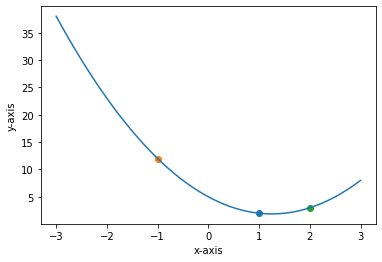

In [20]:
x = np.linspace(-3,3)
y = a*x**2 + b*x + c

#plot the function. (Transpose is needed to make the data line up).
plt.plot(x,y.transpose())

#Plot the original points
plt.scatter(1, 2)
plt.scatter(-1, 12)
plt.scatter(2, 3)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

&#9989; **<font color=red>QUESTION</font>** The following program is intended to take four points as inputs ($p1, p2, p3, p4 \in \mathbb{R}^2$) and calculate the coefficients $a$, $b$, $c$, and $d$ so that the graph of $f(x) = ax^3 + bx^2 + cx + d$ passes smoothly through the points.  Test the function with the following points (1,2), (-1,6), (2,3), (3,2) as inputs and print the values for $a$, $b$, $c$, and $d$.

In [21]:
def fitPoly3(p1,p2,p3,p4):
    A = np.matrix([[p1[0]**3, p1[0]**2, p1[0], 1],
                   [p2[0]**3, p2[0]**2, p2[0], 1],
                   [p3[0]**3, p3[0]**2, p3[0], 1],
                   [p4[0]**3, p4[0]**2, p4[0], 1]])
    
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T

    X = np.linalg.solve(A, b)
    a = X[0]
    b = X[1]
    c = X[2]
    d = X[3]
    #Try to put your figure generation code here for the next question 
    #####Start your code here #####
    x = np.linspace(-3,3)
    y =  a*x**3 + b*x**2 + c*x + d

    #plot the function. (Transpose is needed to make the data line up).
    plt.plot(x,y.transpose())

    #Plot the original points
    plt.scatter(p1[0],p1[1])
    plt.scatter(p2[0], p2[0])
    plt.scatter(p3[0], p3[0])
    plt.scatter(p4[0], p4[0])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    
    #####End of your code here#####       
    return (a,b,c,d)

(matrix([[-0.5]]), matrix([[2.]]), matrix([[-1.5]]), matrix([[2.]]))

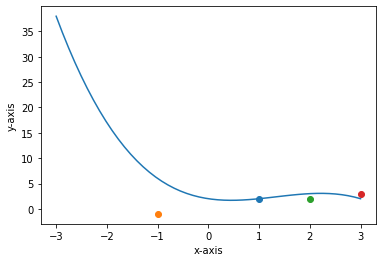

In [22]:
x1 = (1,2)
x2 = (-1,6)
x3 = (2,3)
x4 = (3,2)
fitPoly3(x1,x2,x3,x4)

&#9989; **<font color=red>QUESTION</font>** Modify the above ```fitpoly3``` function to also generate a figure of the input points and the resulting polynomial in range ```x=(-2,4)```. 

(matrix([[-0.5]]), matrix([[2.]]), matrix([[-1.5]]), matrix([[2.]]))

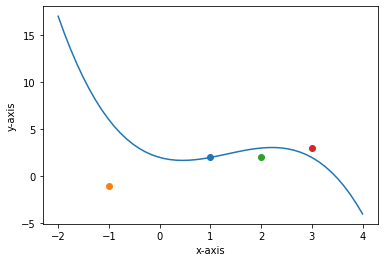

In [23]:
# Put the answer to the above question above or copy and paste the above function and modify it in this cell. 
def fitPoly3(p1,p2,p3,p4):
    A = np.matrix([[p1[0]**3, p1[0]**2, p1[0], 1],
                   [p2[0]**3, p2[0]**2, p2[0], 1],
                   [p3[0]**3, p3[0]**2, p3[0], 1],
                   [p4[0]**3, p4[0]**2, p4[0], 1]])
    
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T

    X = np.linalg.solve(A, b)
    a = X[0]
    b = X[1]
    c = X[2]
    d = X[3]
    #Try to put your figure generation code here for the next question 
    #####Start your code here #####
    x = np.linspace(-2,4)
    y =  a*x**3 + b*x**2 + c*x + d

    #plot the function. (Transpose is needed to make the data line up).
    plt.plot(x,y.transpose())

    #Plot the original points
    plt.scatter(p1[0],p1[1])
    plt.scatter(p2[0], p2[0])
    plt.scatter(p3[0], p3[0])
    plt.scatter(p4[0], p4[0])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    
    #####End of your code here#####       
    return (a,b,c,d)

x1 = (1,2)
x2 = (-1,6)
x3 = (2,3)
x4 = (3,2)
fitPoly3(x1,x2,x3,x4)

&#9989; **<font color=red>QUESTION</font>** Give any four $\mathbb{R}^2$ input points to ```fitPoly3```, is there always a unique solution?  Explain your answer. 

**Yes**

----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.